# Heart Disease Classifier 

# 💾  Data dictionary

1. `age` - age in years
2. `sex` - (1 = male; 0 = female)
3. `ChestPainType` - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. `RestingBP` - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. `Cholesterol` - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. `FastingBS` - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. `RestingECG` - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. `MaxHR` - maximum heart rate achieved
9. `ExerciseAngina` - exercise induced angina (1 = yes; 0 = no)
10. `oldpeak` - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. `ST_Slope` - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. `target` - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Import all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report,confusion_matrix
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
import pickle

### Loading the data set

In [50]:
df=pd.read_csv("heart.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [52]:
pd.set_option('display.max_columns', None)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.describe(include="all")

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


### Checking dupliacte records and records with null values

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### unique values in catgorical features

In [54]:
for column in df.select_dtypes(include="O").columns:
    print(column,df[column].nunique(),sorted(df[column].unique()),sep="\n")

Sex
2
['F', 'M']
ChestPainType
4
['ASY', 'ATA', 'NAP', 'TA']
RestingECG
3
['LVH', 'Normal', 'ST']
ExerciseAngina
2
['N', 'Y']
ST_Slope
3
['Down', 'Flat', 'Up']


## Exploratory Data Analysis

<AxesSubplot:xlabel='Age', ylabel='count'>

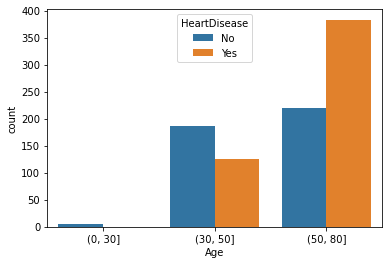

In [9]:
sns.countplot(x=pd.cut(df.Age,bins=[0,30,50,80]),hue=df.HeartDisease.map({0:"No",1:"Yes"}))

**OBSERVATION**:Adults age 50 and older are more likely than younger people to have heart disease

<AxesSubplot:xlabel='Sex', ylabel='count'>

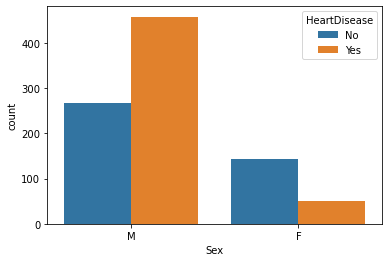

In [10]:
sns.countplot(x=df["Sex"],hue=df.HeartDisease.map({0:"No",1:"Yes"}))

**OBSERVATION**:Men are affected more than Women by Heart Diseases 

<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

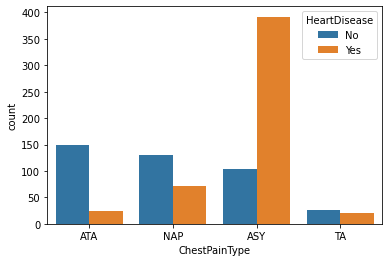

In [11]:
sns.countplot(x=df.ChestPainType,hue=df.HeartDisease.map({0:"No",1:"Yes"}))

**OBSERVATION**:Asymptomatic is the most common type of chest pain among patients with heart disease

<AxesSubplot:xlabel='RestingECG', ylabel='count'>

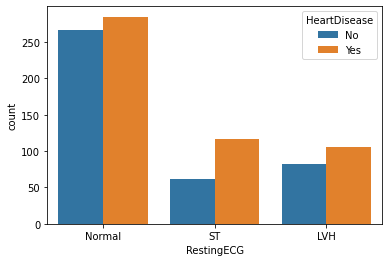

In [12]:
sns.countplot(x=df.RestingECG,hue=df.HeartDisease.map({0:"No",1:"Yes"}))

([<matplotlib.axis.XTick at 0x2bd18860c70>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

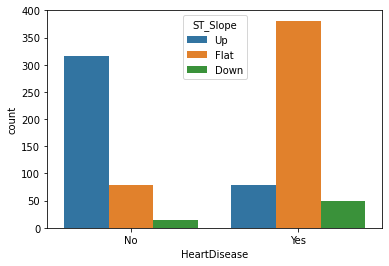

In [13]:
sns.countplot(x=df.HeartDisease,hue=df.ST_Slope)
plt.xticks([0,1], ['No', 'Yes']) 

**OBSERVATION**:Flat is the most common type of st_slop among patients with heart disease

### Analysing the correlation between feature

<AxesSubplot:>

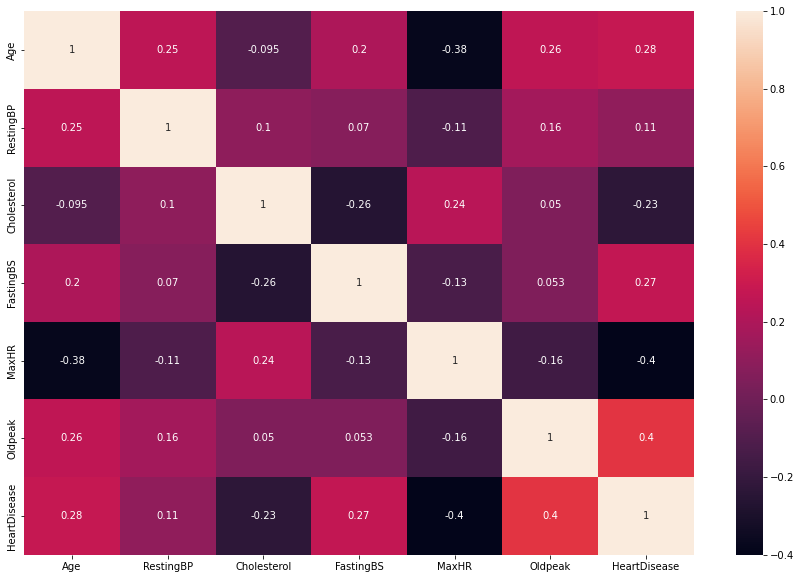

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot= True)

From this we could see that there is no strong correlation between features. So there is no issue with Multi-Collinearity

### PairPlot for analysing distribution

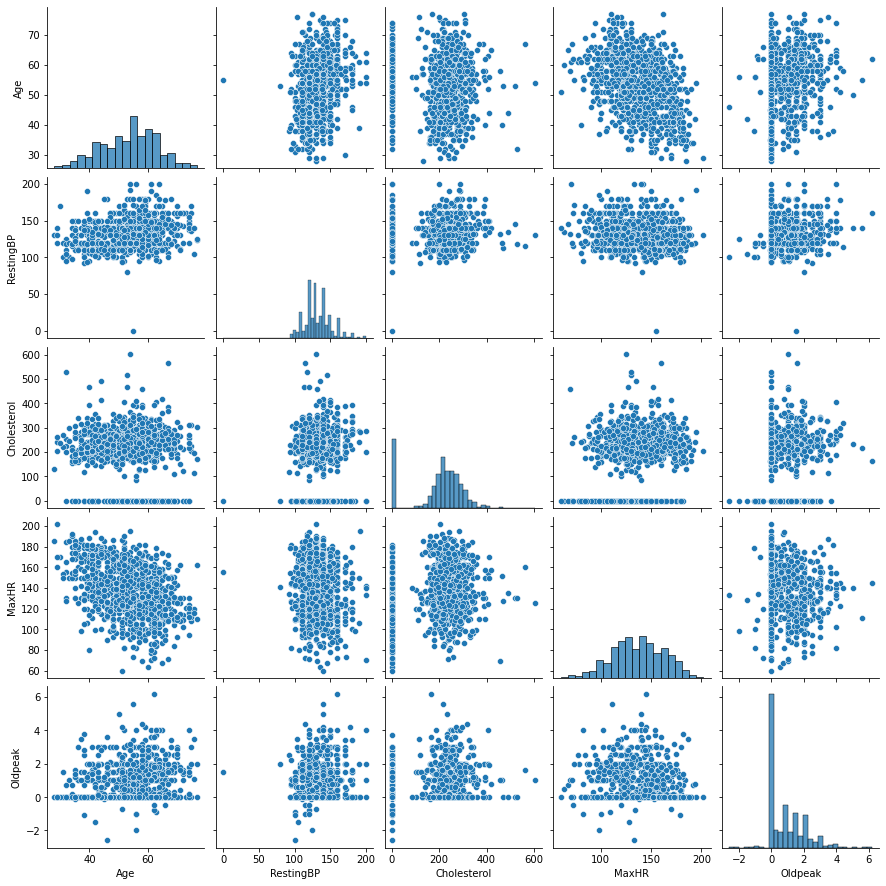

In [15]:
sns.pairplot(df[["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"]])

Looks like balanced datasets

### Handling Outliers

<AxesSubplot:xlabel='RestingBP'>

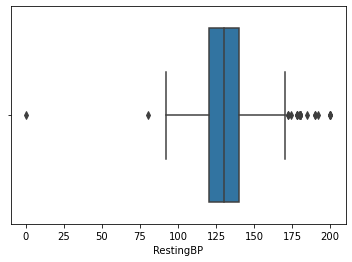

In [16]:
sns.boxplot(x=df.RestingBP)

<AxesSubplot:xlabel='Cholesterol'>

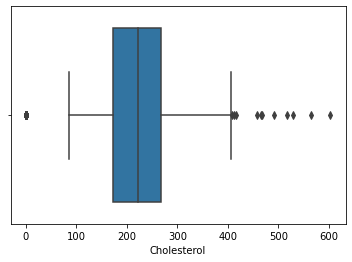

In [17]:
sns.boxplot(x=df.Cholesterol)

<AxesSubplot:xlabel='MaxHR'>

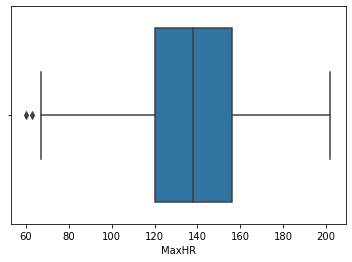

In [18]:
sns.boxplot(x=df.MaxHR)

<AxesSubplot:xlabel='Oldpeak'>

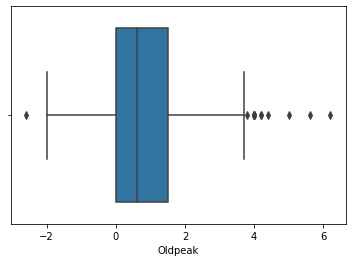

In [19]:
sns.boxplot(x=df.Oldpeak)

#### Replacing 0 in cholestrol value with median

No. of records with Cholesterol :172
Dropping records with Cholesterol greater than 500


<AxesSubplot:xlabel='Cholesterol'>

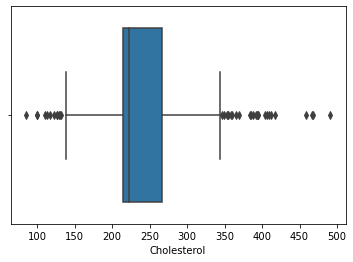

In [20]:
print('No. of records with Cholesterol :{}'.format(len(df[df.Cholesterol==0])))
print("Dropping records with Cholesterol greater than 500")
df=df[df.Cholesterol<500]
df.Cholesterol=df["Cholesterol"].replace(0,df.Cholesterol.median())
sns.boxplot(x=df.Cholesterol)

#### Droping Outliers for RestingBp

In [21]:
df=df[~((df.RestingBP<50)|(df.RestingBP>200))]

### Encoding Binary categories with 0 and 1

In [22]:
df["Sex"]=df["Sex"].map({"M":0,"F":1})
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,1,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,0,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [23]:
df["ExerciseAngina"]=df["ExerciseAngina"].map({"N":0,"Y":1})
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,1,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,0,NAP,150,195,0,Normal,122,0,0.0,Up,0


All the continous features are normally distributed except old Peak

###  Checking the balance of dataset

In [24]:
df["HeartDisease"].value_counts(normalize=True)

1    0.552026
0    0.447974
Name: HeartDisease, dtype: float64

### Separating Features and Target Variables

In [25]:
x=df.drop("HeartDisease",axis=1)
y=df.HeartDisease

### Splitting train and test data

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=12)

In [27]:
cat_cols=x.select_dtypes(include="O").columns.to_list()
num_cols=["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"]
cat_cols

['ChestPainType', 'RestingECG', 'ST_Slope']

### Scaling continuous colums with StandardScaler and encoding Catogerical columns with OneHotEncoder

In [28]:
ct=ColumnTransformer([
    ("step1",StandardScaler(),num_cols),
    ("step2",OneHotEncoder(sparse=False, handle_unknown="error",drop="first"),cat_cols)
],remainder="passthrough")
x_train_scaled=ct.fit_transform(x_train)
x_test_scaled=ct.transform(x_test)

### Hyperparameter Tuning with different classifier models using GridSearchCv

In [29]:
model_params={
    "LogisticRegression":{
        "model":LogisticRegression(),
        "params":{
            "penalty":["none","l1","l2","elasticnet"],
            "C":[0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0],
            "max_iter":[100,150,200]
        }
    },
    "DecisionTreeClassifier":{
        "model":DecisionTreeClassifier(),
        "params":{
            "criterion":["gini","entropy"]
        }
    },
    "RandomForestClassifier":{
        "model":RandomForestClassifier(),
        "params":{
            "n_estimators":[100,150,200,250],
            "criterion":["gini","entropy"]
        }
    },
    "BernoulliNB":{
        "model":BernoulliNB(),
        "params":{
            "alpha":[0.4,0.8,1.0,1.4,1.8]
        }
    },
    "XGBClassifier":{
        "model":XGBClassifier(objective="binary:logistic"),
        "params":{
            "n_estimators":[100,150,200,250],
            "reg_lambda":[0.4,0.8,1.0,1.2,1.5]
        }
    },
    "SVM":{
        "model":SVC(),
        "params":{
            "C":[0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0],
            "kernel":['linear', 'poly', 'rbf', 'sigmoid']
        }
    },
    "KNN":{
        "model":KNeighborsClassifier(),
        "params":{
            "n_neighbors":[5,6,7,8,9,10,12,14,16,18],
            "weights":["uniform","distance"],
            "algorithm":['ball_tree', 'kd_tree', 'brute']
        }
    }
    
}

In [30]:
results={}
for model_name,params in model_params.items():
    model=params["model"]
    param=params["params"]
#     kf=StratifiedKFold(n_splits=5)
    clf=GridSearchCV(model,param_grid=param,cv=5,n_jobs=-1,scoring="f1")
    clf.fit(x_train_scaled,y_train)
    results[model_name]=clf

D:\Users\rselvaganapathy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.8703022         nan 0.87678152        nan 0.8703022         nan
 0.87678152        nan 0.8703022         nan 0.87678152        nan
 0.8703022         nan 0.87866748        nan 0.8703022         nan
 0.87866748        nan 0.8703022         nan 0.87866748        nan
 0.8703022         nan 0.87486112        nan 0.8703022         nan
 0.87486112        nan 0.8703022         nan 0.87486112        nan
 0.8703022         nan 0.87144301        nan 0.8703022         nan
 0.87144301        nan 0.8703022         nan 0.87144301        nan
 0.8703022         nan 0.87004185        nan 0.8703022         nan
 0.87004185        nan 0.8703022         nan 0.87004185        nan
 0.8703022         nan 0.87004185        nan 0.8703022         nan
 0.87004185        nan 0.8703022         nan 0.87004185        nan
 0.8703022         nan 0.87004185        na

[15:32:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Best Logistic Regression Model

{'C': 0.4, 'max_iter': 100, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.87      0.80      0.84        82
           1       0.85      0.90      0.88       101

    accuracy                           0.86       183
   macro avg       0.86      0.85      0.86       183
weighted avg       0.86      0.86      0.86       183



<AxesSubplot:>

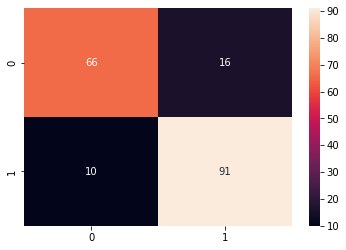

In [39]:
print(results["LogisticRegression"].best_params_)
LR_model=results["LogisticRegression"].best_estimator_
LR_model.fit(x_train_scaled,y_train)
LR_cr=classification_report(y_test,LR_model.predict(x_test_scaled))
print(LR_cr)
sns.heatmap(confusion_matrix(y_test,LR_model.predict(x_test_scaled)),annot=True)

### Best Decision Tree Classifier

{'criterion': 'entropy'}
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        82
           1       0.83      0.77      0.80       101

    accuracy                           0.79       183
   macro avg       0.79      0.79      0.79       183
weighted avg       0.79      0.79      0.79       183



<AxesSubplot:>

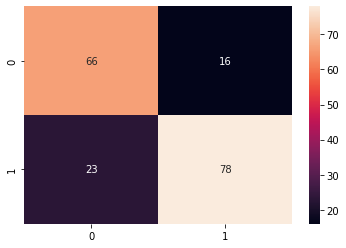

In [40]:
print(results["DecisionTreeClassifier"].best_params_)
DT_model=results["DecisionTreeClassifier"].best_estimator_
DT_model.fit(x_train_scaled,y_train)
DT_cr=classification_report(y_test,DT_model.predict(x_test_scaled))
print(DT_cr)
sns.heatmap(confusion_matrix(y_test,DT_model.predict(x_test_scaled)),annot=True)

### Best RandomForestClasifier

{'criterion': 'gini', 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        82
           1       0.87      0.90      0.88       101

    accuracy                           0.87       183
   macro avg       0.87      0.87      0.87       183
weighted avg       0.87      0.87      0.87       183



<AxesSubplot:>

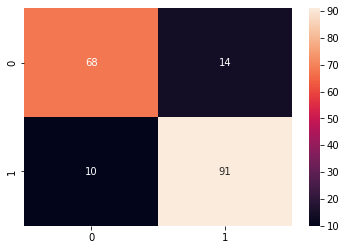

In [41]:
print(results["RandomForestClassifier"].best_params_)
RF_model=results["RandomForestClassifier"].best_estimator_
RF_model.fit(x_train_scaled,y_train)
RF_cr=classification_report(y_test,RF_model.predict(x_test_scaled))
print(RF_cr)
sns.heatmap(confusion_matrix(y_test,RF_model.predict(x_test_scaled)),annot=True)

### Best Naive Bayes Classifier

{'alpha': 0.4}
              precision    recall  f1-score   support

           0       0.85      0.82      0.83        82
           1       0.86      0.88      0.87       101

    accuracy                           0.85       183
   macro avg       0.85      0.85      0.85       183
weighted avg       0.85      0.85      0.85       183



<AxesSubplot:>

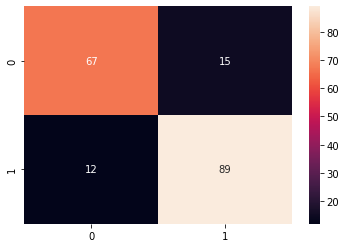

In [42]:
print(results["BernoulliNB"].best_params_)
NB_model=results["BernoulliNB"].best_estimator_
NB_model.fit(x_train_scaled,y_train)
NB_cr=classification_report(y_test,NB_model.predict(x_test_scaled))
print(NB_cr)
sns.heatmap(confusion_matrix(y_test,NB_model.predict(x_test_scaled)),annot=True)

### Best XGBClassifier

{'n_estimators': 100, 'reg_lambda': 1.2}
[15:37:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\rselvaganapathy\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.84      0.82      0.83        82
           1       0.85      0.87      0.86       101

    accuracy                           0.85       183
   macro avg       0.85      0.84      0.84       183
weighted avg       0.85      0.85      0.85       183



<AxesSubplot:>

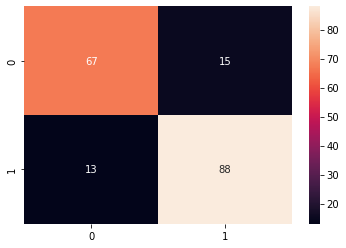

In [43]:
print(results["XGBClassifier"].best_params_)
XGB_model=results["XGBClassifier"].best_estimator_
XGB_model.fit(x_train_scaled,y_train)
XGB_cr=classification_report(y_test,XGB_model.predict(x_test_scaled))
print(XGB_cr)
sns.heatmap(confusion_matrix(y_test,XGB_model.predict(x_test_scaled)),annot=True)

### Best SVM Classifier

{'C': 1.6, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        82
           1       0.85      0.91      0.88       101

    accuracy                           0.86       183
   macro avg       0.87      0.86      0.86       183
weighted avg       0.86      0.86      0.86       183



<AxesSubplot:>

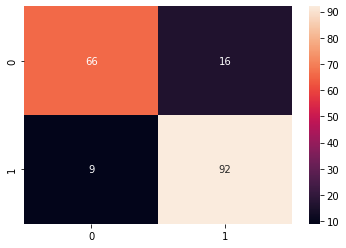

In [44]:
print(results["SVM"].best_params_)
SVM_model=results["SVM"].best_estimator_
SVM_model.fit(x_train_scaled,y_train)
SVM_cr=classification_report(y_test,SVM_model.predict(x_test_scaled))
print(SVM_cr)
sns.heatmap(confusion_matrix(y_test,SVM_model.predict(x_test_scaled)),annot=True)

### Best KNN Classifier

{'algorithm': 'ball_tree', 'n_neighbors': 6, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        82
           1       0.87      0.89      0.88       101

    accuracy                           0.86       183
   macro avg       0.86      0.86      0.86       183
weighted avg       0.86      0.86      0.86       183



<AxesSubplot:>

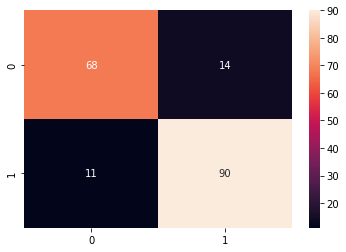

In [37]:
print(results["KNN"].best_params_)
KNN_model=results["KNN"].best_estimator_
KNN_model.fit(x_train_scaled,y_train)
KNN_cr=classification_report(y_test,KNN_model.predict(x_test_scaled))
print(KNN_cr)
sns.heatmap(confusion_matrix(y_test,KNN_model.predict(x_test_scaled)),annot=True)

From the evaluation, we found that RandomForest has better performance

In [60]:
best_model=RF_model
pickle.dump(best_model,open("model.pkl","wb"))
pickle.dump(ct,open("transform.pkl","wb"))

In [67]:
df.sample()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
778,58,M,ASY,128,259,0,LVH,130,Y,3.0,Flat,1
